In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

In [2]:
import time
import numpy as np

from river import stats
from river.datasets import synth
from river import drift

from generators import Gaussian

import matplotlib.pyplot as plt

In [3]:
np.random.seed(42)
data_stream = np.concatenate(
    (np.random.uniform(low=0, high=1, size=1000),
    np.random.uniform(low=1, high=2, size=1000))
)

In [4]:
data_stream

array([0.37454012, 0.95071431, 0.73199394, ..., 1.06895802, 1.05705472,
       1.28218707])

In [5]:
np.mean(data_stream[1000:])

1.5070173051792035

In [6]:
mean = stats.Mean()
vals = []
for n in data_stream:
    vals.append(mean.update(n).get())

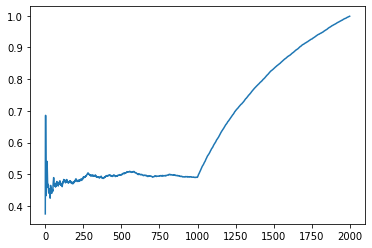

In [7]:
plt.plot(vals)


In [8]:
mean = stats.Mean()
vals = []
stream = Gaussian(mu=.5, sigma=.5, seed=42)
for i, t in enumerate(stream):
    if i == 10000:
        break
    vals.append(mean.update(t[1]).get())

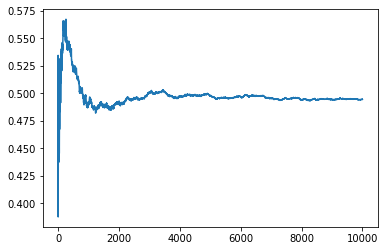

In [9]:
plt.plot(vals)

In [10]:
def get_stream():
    seed=42
    return synth.ConceptDriftStream(
        stream=synth.ConceptDriftStream(stream=Gaussian(0, .01, seed=seed),
                                        drift_stream=Gaussian(2, .0, seed=seed),
                                        width=1000, position=5000, seed=seed),
        drift_stream=Gaussian(1, .0, seed=seed), width=1000, position=10000, seed=seed)
stream = get_stream()
mean = stats.Mean()
rolling_mean = stats.RollingMean(window_size=1000)
vals = []
rolling_vals = []
for i, t in enumerate(stream):
    if i == 20000:
        break
    vals.append(mean.update(t[1]).get())
    rolling_vals.append(rolling_mean.update(t[1]).get())

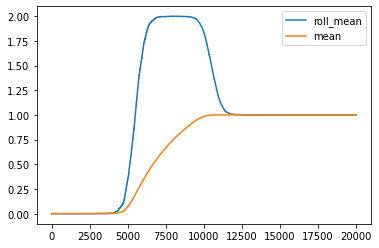

In [11]:
plt.plot(rolling_vals, label='roll_mean')
plt.plot(vals, label='mean')
plt.legend()

In [12]:
stream = get_stream()
adwin = drift.ADWIN()
drift_pos = []

total_time = 0
for i, t in enumerate(stream):
    if i == 20000:
        break
    start = time.time()
    adwin.update(t[1])
    total_time += (time.time() - start)
    if adwin.drift_detected:
        print(f'Drift detected at {i}')
        drift_pos.append(i)
        adwin.reset()
        
total_time

Drift detected at 4383
Drift detected at 4895
Drift detected at 5375
Drift detected at 6335
Drift detected at 9599
Drift detected at 10175
Drift detected at 10783


0.04598665237426758

Text(0.5, 1.0, 'ADWIN')

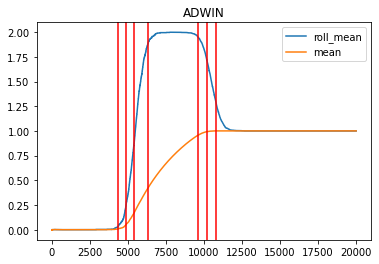

In [13]:
plt.plot(rolling_vals, label='roll_mean')
plt.plot(vals, label='mean')
plt.legend()
for x in drift_pos:
    plt.axvline(x, color='r')
plt.title('ADWIN')

In [18]:
from adwin import ADWIN

stream = get_stream()
adwin = ADWIN(delta=.002)
drift_pos = []

total_time = 0
for i, t in enumerate(stream):
    if i == 20000:
        break
    start = time.time()
    adwin.update(t[1])
    total_time += (time.time() - start)
    if adwin.drift_detected:
        print(f'Drift detected at {i}')
        drift_pos.append(i)
        adwin.reset()

total_time

Drift detected at 4159
Drift detected at 4767
Drift detected at 5247
Drift detected at 5887
Drift detected at 9439
Drift detected at 9983
Drift detected at 10527
Drift detected at 11839


0.3822627067565918

Text(0.5, 1.0, 'new ADWIN')

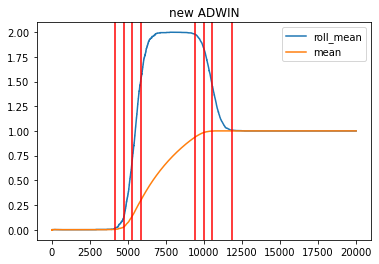

In [15]:
plt.plot(rolling_vals, label='roll_mean')
plt.plot(vals, label='mean')
plt.legend()
for x in drift_pos:
    plt.axvline(x, color='r')
plt.title('new ADWIN')